In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [3]:
date_range = pd.date_range(start='2022-01-01', end='2024-12-31', freq='D')
sales_data = 100 + np.arange(len(date_range)) * 0.1 + np.sin(np.arange(len(date_range)) / 36.5) * 20 + np.random.normal(0, 10, len(date_range))
df = pd.DataFrame({'sales': sales_data}, index=date_range)

In [4]:
train_size = int(len(df)*0.9)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [5]:
model = ARIMA(train['sales'], order=(5, 1, 0))
model_fit = model.fit()

In [6]:
predictions = model_fit.forecast(steps=len(test))
test['predictions'] = predictions

C:\Users\sriha\AppData\Local\Temp\ipykernel_7408\3859288546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


In [12]:
rmse = np.sqrt(mean_squared_error(test['sales'], test['predictions']))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 17.72


In [13]:
mape = mean_absolute_percentage_error (test['sales'], test['predictions'])
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Percentage Error (MAPE): 7.60%


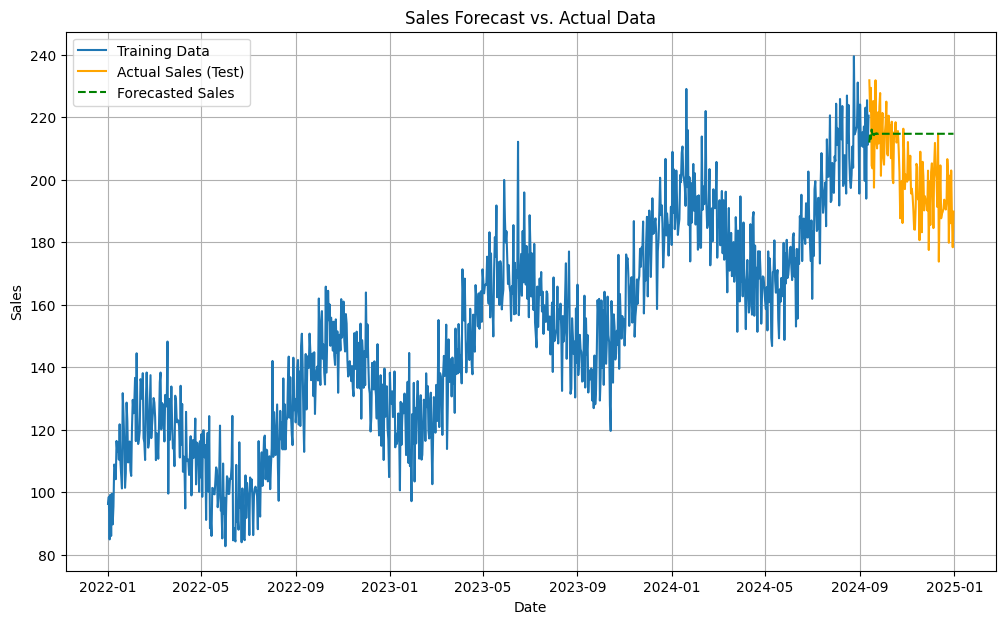

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(train['sales'], label='Training Data')
plt.plot(test['sales'], label='Actual Sales (Test)', color='orange')
plt.plot(test['predictions'], label='Forecasted Sales', color='green', linestyle='--')
plt.title('Sales Forecast vs. Actual Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()